# **Data Mining Notebook**

## **1. Introduction**

"A brief description of your approach to the problem and the results that you have obtained on the training data."

*A brief precis of the equivalent section in your report.*

In [114]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## **2. Data Import**

*This section is how you import the data into the notebook. It should be written in such a way that I can modify it to run on my own machine by simply changing the location of the training data and any additional data sources that you have used.*

In [115]:
ORIGINAL_MATCH_HISTORY = '../dataset/match_history.csv'

INTERPOLATED_MATCH_HISTORY = '../dataset/reconstructed/interpolated_match_history.csv'
LINEAR_REGRESSION_MATCH_HISTORY = '../dataset/reconstructed/linear_regression_match_history.csv'
NEW_FEATURE_INTERPOLATED_MATCH_HISTORY = '../dataset/reconstructed/new_features_interpolated_match_history.csv'
NEW_FEATURE_LINEAR_REGRESSION_MATCH_HISTORY = '../dataset/reconstructed/new_features_linear_regression_match_history.csv'
NEW_FEATURE_GAUSSIAN_MATCH_HISTORY = '../dataset/reconstructed/new_features_gaussian_match_history.csv'

In [116]:
train_dataset = ORIGINAL_MATCH_HISTORY
df = pd.read_csv(train_dataset)
df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,2004-09-03,Spain,Scotland,Europe,Europe,3,67,0,0,1,...,No,Draw,94.0,84.0,86.5,89.3,89.5,80.2,79.7,81.8
1,2004-09-04,Albania,Greece,Europe,Europe,94,14,0,0,2,...,No,Win,NaN,90.0,NaN,59.0,74.5,82.8,83.7,85.2
2,2004-09-04,Austria,England,Europe,Europe,90,7,0,0,2,...,No,Draw,83.0,88.0,76.2,73.0,74.0,90.5,88.7,91.2
3,2004-09-04,Croatia,Hungary,Europe,Europe,25,76,0,0,3,...,No,Win,77.0,74.0,80.5,78.7,79.0,71.8,75.7,70.2
4,2004-09-04,Denmark,Ukraine,Europe,Europe,15,87,0,0,1,...,No,Draw,82.0,NaN,79.5,85.0,81.5,NaN,81.7,65.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5636,2021-12-07,Algeria,Egypt,Africa,Africa,32,45,1508,1449,1,...,No,Draw,78.0,NaN,78.0,81.0,78.0,NaN,79.3,70.8
5637,2021-12-08,Mexico,Chile,North America,South America,14,24,1638,1541,2,...,No,Draw,80.0,79.0,76.8,82.7,78.2,75.5,76.7,78.2
5638,2021-12-11,Morocco,Algeria,Africa,Africa,28,32,1525,1508,2,...,Yes,Lose,82.0,78.0,81.2,81.7,76.2,78.0,81.0,78.0
5639,2021-12-18,Tunisia,Algeria,Africa,Africa,29,32,1512,1508,0,...,No,Lose,NaN,78.0,70.8,72.3,74.0,78.0,81.0,78.0


## **3. Data Transformation & Exploration**

"Any transformations that you apply to the data prior to training. Also, any exploration of the data that you performed such as visualization, feature selection, etc."

The following code produces four different graphs to visualise the key features in the dataset. It plots each of these features against FIFA rank, illustrating the general upward trend of teams performing better in all aspects the better their FIFA rank is.

In [117]:
HOME_FEATURE_INDEXES = [17, 19, 20, 21]
AWAY_FEATURE_INDEXES = [18, 22, 23, 24]
HOME_TEAM_FIFA_RANK = 5
AWAY_TEAM_FIFA_RANK = 6
PLOT_TITLES = ['Goalkeeper', 'Defense', 'Offense', 'Midfield']
PLOT_COLOURS = 'rbgm'


def plot_fifa_score(original_data: str) -> None:
    '''
    Pull data from the given csv and plot 4 graphs, different features from the dataset against FIFA rank.
    '''
    with open(original_data) as csv_in_file:
        csv_reader = csv.reader(csv_in_file)
        next(csv_reader)

        ranks = []
        features = {'Goalkeeper': [], 'Defense': [], 'Offense': [], 'Midfield': []}

        for row in csv_reader:
            # Get the correct features from the dataset for both
            # the home and away team.
            home_features = [row[i] for i in HOME_FEATURE_INDEXES]
            away_features = [row[i] for i in AWAY_FEATURE_INDEXES]

            # Only append the data and rank of the corresponding team if the data points
            # are fully intact and have no missing features.
            if '' not in home_features and '' not in away_features:
                ranks.append(int(row[HOME_TEAM_FIFA_RANK]))
                ranks.append(int(row[AWAY_TEAM_FIFA_RANK]))
                for i, score in enumerate(PLOT_TITLES):
                    new_points = [float(home_features[i]), float(away_features[i])]
                    features[score].extend(new_points)

        # Plot all four graphs on the same figure, with seperate colours and titles.
        fig, axs = plt.subplots(4, 1, constrained_layout=True)
        fig.suptitle('A plot of different score metrics by FIFA ranking')

        plot_data = zip(PLOT_COLOURS, features.items())
        for i, (colour, (title, data)) in enumerate(plot_data):
            axs[i].scatter(ranks, data, s=10, c=colour, marker='.')
            axs[i].set_title(f'{title} by FIFA rank')
            axs[i].set_xlabel('FIFA rank')
            axs[i].set_ylabel('Score')

        plt.show()

plot_fifa_score(ORIGINAL_MATCH_HISTORY)

UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 1658: character maps to <undefined>

## Linear Interpolation Reconstruction

The following code using Pandas' Series.interpolate() function to replace NaN values in the original dataset with linearly interpolated values, for each of the four features that have missing data.

In [ ]:
def interpolote_missing_data(original_data: str) -> dict:
    '''Interpolate completely missing features using Pandas .interpolate()'''

    with open(original_data) as csv_in_file:
        csv_reader = csv.reader(csv_in_file)
        next(csv_reader)

        features = {'Goalkeeper': [], 'Defense': [], 'Offense': [], 'Midfield': []}
        interpolated_features = {'Goalkeeper': [], 'Defense': [], 'Offense': [], 'Midfield': []}

        for row in csv_reader:
            # Get the correct features from the dataset for both
            # the home and away team
            home_features = [row[i] for i in HOME_FEATURE_INDEXES]
            away_features = [row[i] for i in AWAY_FEATURE_INDEXES]
            
            # Append a tuple of (FIFA rank, value) to the feature dictionary for each type of score,
            # where the value is replace with a NumPy NaN value if it is missing
            for i, score in enumerate(PLOT_TITLES):
                home_val = np.nan if home_features[i] == '' else home_features[i]
                away_val = np.nan if away_features[i] == '' else away_features[i]
                features[score].append((int(row[HOME_TEAM_FIFA_RANK]), (home_val)))
                features[score].append((int(row[AWAY_TEAM_FIFA_RANK]), (away_val)))

        # For each different score type, order the list in the dictionary by FIFA rank, create a
        # pandas Series using the values, and replace the NaN values through linear interpolation.
        # Insert these new values into a new dictionary and return 
        for i, score in enumerate(PLOT_TITLES):
            sorted_score = [float(s) for (_, s) in sorted(features[score], key=lambda x: x[0])]
            interpolated_features[score] = list(pd.Series(sorted_score).interpolate())
    return interpolated_features

In [ ]:
def get_averages(original_data: str) -> dict:
    '''
    Find average values for each 4 features for each country.
    '''

    countries = {}

    with open(original_data) as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)
        count = 0
        
        # For each row in the original match_history.csv file, loop over all of the rows
        # and keep a running total of each of the 4 scores in PLOT_TITLES, for each country, along
        # with the number of times that that feature was seen for said country (since sometimes
        # they are missing) and insert the values into a dictionary.
        for row in csv_reader:
            if '' in row:
                count += 1
            home_country, away_country = row[1], row[2]
            home_features = [row[i] for i in HOME_FEATURE_INDEXES]
            away_features = [row[i] for i in AWAY_FEATURE_INDEXES]

            if home_country not in countries.keys():
                countries[home_country] = [[0, 0], [0, 0], [0, 0], [0, 0]]
            if away_country not in countries.keys():
                countries[away_country] = [[0, 0], [0, 0], [0, 0], [0, 0]]

            for i, val in enumerate(home_features):
                if val != '':
                    countries[home_country][i][0] += float(val)
                    countries[home_country][i][1] += 1

            for i, val in enumerate(away_features):
                if val != '':
                    countries[away_country][i][0] += float(val)
                    countries[away_country][i][1] += 1
        
        # For each country in the dictionary, replace the list of score totals and counts with
        # their corresponding calculated averages and return.
        for country, vals in countries.items():
            averages = [round(val / max(1, count), 1) for [val, count] in vals]
            countries[country] = averages
        # Show which countries have at least one feature completely missing in the dataset
        for country, vals in countries.items():
            if 0.0 in vals:
                print(f'{country} has a completely missing value.')
    return countries

In [ ]:
def write_interpolated_data(original_data: str, new_data: str, countries: dict) -> None:
    '''
    For each row in the input csv, write to the output csv filling in missisng
    values, with that countries average for that feature.
    '''

    with open(original_data) as csv_in, open(new_data, 'w+') as csv_out:
        csv_reader = csv.reader(csv_in)
        csv_writer = csv.writer(csv_out)
        csv_writer.writerow(next(csv_reader))
        
        # Gather interpolated data 
        interpolated_features = interpolote_missing_data(original_data)
        
        # For each row in the original match_history.csv file, loop over all of the records.
        # If any record has a value missing value, check whether the corresponding country has an average
        # for the missing feature. If so, replace the missing data with that average, if not, replace it
        # with the interpolated value. Finally, write the updated data into a new .csv file.
        for row in csv_reader:
            for i, val in enumerate(row):
                if val == '':
                    if i in HOME_FEATURE_INDEXES:
                        replace_index = HOME_FEATURE_INDEXES.index(i)
                        if countries[row[1]][replace_index] == 0.0:
                            score_type = PLOT_TITLES[replace_index]
                            row[i] = round(interpolated_features[score_type][int(row[HOME_TEAM_FIFA_RANK])], 1)
                        else:
                            row[i] = countries[row[1]][replace_index]

                    elif i in AWAY_FEATURE_INDEXES:
                        replace_index = AWAY_FEATURE_INDEXES.index(i)
                        if countries[row[2]][replace_index] == 0.0:
                            score_type = PLOT_TITLES[replace_index]
                            row[i] = round(interpolated_features[score_type][int(row[AWAY_TEAM_FIFA_RANK])], 1)
                        else:
                            row[i] = countries[row[2]][replace_index]
            csv_writer.writerow(row)

In [ ]:
def reconstruct_with_interpolation(original_data: str, new_data: str) -> None:
    '''
    Reconstruct the missing data in original_data, write to new new_data csv.
    '''

    countries = get_averages(original_data)
    write_interpolated_data(original_data, new_data, countries)

    
# Reconstruct the missing data with linear interpolation and show the results
# Note that home_team_total_fifa_points and away_team_total_fifa_points are not 
# included in this reconstruction, because they are not being used in our regresion models
reconstruct_with_interpolation(ORIGINAL_MATCH_HISTORY, INTERPOLATED_MATCH_HISTORY)
df = pd.read_csv(INTERPOLATED_MATCH_HISTORY)
df

UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 1658: character maps to <undefined>

## Linear Regression Reconstruction

## Gaussian Distribution Reconstruction

NOTE TO JAMES: 
DATA PREPARATION AND UTILITY PARTS ARE DEPENDENCIES FOR OTHER CODE

### Data Preparation

In [118]:
train_dataset = ORIGINAL_MATCH_HISTORY
g_df = pd.read_csv(train_dataset)

In [119]:
#Simple data modification
g_df = g_df.fillna(0)
g_df["home_team_result"] = g_df["home_team_result"].replace(['Lose', 'Draw', 'Win'], [0, 1, 2])
g_df["neutral_location"] = g_df["neutral_location"].astype(int)
g_df['date'] = g_df['date'].str.replace(r"\D", "")

g_df

C:\Users\Sagat\AppData\Local\Temp\ipykernel_14444\126057292.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  g_df['date'] = g_df['date'].str.replace(r"\D", "")


,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,20040903,Spain,Scotland,Europe,Europe,3,67,0,0,1,...,No,1,94.0,84.0,86.5,89.3,89.5,80.2,79.7,81.8
1,20040904,Albania,Greece,Europe,Europe,94,14,0,0,2,...,No,2,0.0,90.0,0.0,59.0,74.5,82.8,83.7,85.2
2,20040904,Austria,England,Europe,Europe,90,7,0,0,2,...,No,1,83.0,88.0,76.2,73.0,74.0,90.5,88.7,91.2
3,20040904,Croatia,Hungary,Europe,Europe,25,76,0,0,3,...,No,2,77.0,74.0,80.5,78.7,79.0,71.8,75.7,70.2
4,20040904,Denmark,Ukraine,Europe,Europe,15,87,0,0,1,...,No,1,82.0,0.0,79.5,85.0,81.5,0.0,81.7,65.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5636,20211207,Algeria,Egypt,Africa,Africa,32,45,1508,1449,1,...,No,1,78.0,0.0,78.0,81.0,78.0,0.0,79.3,70.8
5637,20211208,Mexico,Chile,North America,South America,14,24,1638,1541,2,...,No,1,80.0,79.0,76.8,82.7,78.2,75.5,76.7,78.2
5638,20211211,Morocco,Algeria,Africa,Africa,28,32,1525,1508,2,...,Yes,0,82.0,78.0,81.2,81.7,76.2,78.0,81.0,78.0
5639,20211218,Tunisia,Algeria,Africa,Africa,29,32,1512,1508,0,...,No,0,0.0,78.0,70.8,72.3,74.0,78.0,81.0,78.0


In [120]:
#Define variables for later use
home_score = [
    'home_team_goalkeeper_score', 
    'home_team_mean_defense_score', 
    'home_team_mean_offense_score',
    'home_team_mean_midfield_score',
]

away_score = [
    'away_team_goalkeeper_score',
    'away_team_mean_defense_score',
    'away_team_mean_offense_score', 
    'away_team_mean_midfield_score',
]

#country = np.unique(country_name, return_counts=True)
country_list = g_df['home_team'].values
country_list = np.unique(country_list)

pos_score = [
    'gk_score',
    'def_score',
    'mid_score',
    'atk_score'
    ]

In [121]:
#Construct dictionary for later use

scores = {}

for index, row in g_df.iterrows():
    home = row['home_team']
    away = row['away_team']
    
    if home not in scores:
        scores[home] = {}
        scores[home]['gk_score'] = []
        scores[home]['def_score'] = []
        scores[home]['mid_score'] = []
        scores[home]['atk_score'] = []
        
    if away not in scores:
        scores[away] = {}
        scores[away]['gk_score'] = []
        scores[away]['def_score'] = []
        scores[away]['mid_score'] = []
        scores[away]['atk_score'] = []
    
    scores[home]['gk_score'].append([row['date'], row['home_team_goalkeeper_score']])
    scores[home]['def_score'].append([row['date'], row['home_team_mean_defense_score']])
    scores[home]['mid_score'].append([row['date'], row['home_team_mean_midfield_score']])
    scores[home]['atk_score'].append([row['date'],row['home_team_mean_offense_score']])
    
    scores[away]['gk_score'].append([row['date'], row['away_team_goalkeeper_score']])
    scores[away]['def_score'].append([row['date'], row['away_team_mean_defense_score']])
    scores[away]['mid_score'].append([row['date'], row['away_team_mean_midfield_score']])
    scores[away]['atk_score'].append([row['date'],row['away_team_mean_offense_score']])
    

### Utility Functions

In [122]:
# fetch according country, position_team_mean_score from dict scores 
# if 0 not included in the data, returns an empty list => no missing values, no prediction needed
def fetch_country_pos_score(country, pos_score):
    predict_target = []
    model_data = []
    
    for item in scores[country][pos_score]:
        if 0 in item:
            predict_target.append(item)
        else:
            model_data.append(item)
            
    if predict_target == []:
        #print("No missing values")
        return []
            
    else:
        #if model_data == []:
            #print("No data available")
        #else:
            #print("Missing", len(predict_target), "values")   
        
        data = [model_data, predict_target]

        # model_data and predict_target to np float array
        data[0] = np.array(data[0]).astype(float)
        data[1] = np.array(data[1]).astype(float)

        return data

#fetch_country_pos_score('Albania','gk_score')

In [123]:
def fetch_country_score(country):
    data = []
    
    #index 0: gk, index 1: def, index 2: mid, index 3: atk
    for score in pos_score:
        #print(score,": ",end = "")
        data.append(fetch_country_pos_score(country,score))
    
    return data

#fetch_country_score('Albania')

### Displaying Data

In [124]:
import matplotlib.pyplot as plt

# plot data based on country and pos_score info
def show_model_data(country, pos_score):
    data = fetch_country_pos_score(country, pos_score)
    
    # don't draw graph if there is no data to draw
    if data == [] or len(data[0]) == 0:
        return
    else:
        model_data = data[0]
        d = np.hsplit(model_data,2)
        plt.scatter(d[0],d[1])
        plt.xlabel('time')
        plt.ylabel(pos_score)
        plt.title("{} {}".format(country,pos_score))
        plt.show()

#show_model_data('Congo','mid_score')
#show_model_data('Azerbaijan', 'def_score')

In [125]:
# displays the variables that needs to be investigated to generate missing values
# so for Albania case, gk and def scores contain missing values => target for prediction
def show_model_data(country):
    print("-------------------------------")
    print(country, "Position Scores")
    print("-------------------------------")

    count = 0
    data = fetch_country_score(country)
    
    for elem in data:
        count += 1
        # again, don't display graph if there is no data
        if elem == [] or len(elem[0]) == 0:
            pass
        else:
            model_data = elem[0]
            d = np.hsplit(model_data,2)
            plt.scatter(d[0],d[1])
            plt.xlabel('time')
            if count == 1:
                plt.title("{} {}".format(country,'gk_score'))
                plt.ylabel('gk_score')
            elif count == 2:
                plt.title("{} {}".format(country,'def_score'))
                plt.ylabel('def_score')
            elif count == 3:
                plt.title("{} {}".format(country,'mid_score'))
                plt.ylabel('mid_score')
            else:
                plt.title("{} {}".format(country,'atk_score'))
                plt.ylabel('atk_score')
            plt.show()

#show_model_data('Albania')
#show_model_data('Congo')
#show_model_data('Azerbaijan')

In [126]:
# display all prediction targets
'''
for country in country_list:
    show_model_data(country)
    print("\n")
'''

'\nfor country in country_list:\n    show_model_data(country)\n    print("\n")\n'

### Gaussian Method

#### Calculation

In [127]:
import scipy.stats as stats
from statistics import mean
from scipy.stats import truncnorm

#translates from sample to sd space given a distribution's mean and sd
def sample_to_sd(sample, mean, sd):
    return (sample - mean) / sd

# use truncated gaussian bounded at lower and upper limits
def generate_truncated_gaussian(params):
    mean = params[0]
    sd = params[1]
    lower = params[2]
    upper = params[3]

    return truncnorm(sample_to_sd(lower, mean, sd), sample_to_sd(upper, mean, sd), loc= mean, scale = sd)

In [128]:
#calculates necessary parameters on given data
def get_gaussian_parameters(data):
    # average data for each score
    avg = np.mean(data[0], axis=0)[1]
    #avdef = np.mean(fetch_country_pos_score('Albania','def_score')[0], axis=0)[1]

    # variance data for each scores for Albania
    var= np.var(data[0], axis=0)[1]
    sd = np.sqrt(var)
    #vardef= np.var(fetch_country_pos_score('Albania','def_score')[0], axis=0)[1]

    #min and max to truncate gaussian
    min = np.amin(data[0], axis=0)[1]
    max = np.amax(data[0], axis=0)[1]

    return [avg, sd, min, max]

#### Sampling

In [129]:
#samples from a generated gaussian distribution
def sample_truncated_gaussian(data):
    params = get_gaussian_parameters(data)
    dist = generate_truncated_gaussian(params)

    if isinstance(dist, int):
        return dist

    return dist.rvs(1)[0]

In [130]:
#gathers position score data and samples gaussian distribution to simulate it
def fetch_gaussian_pos_score(country, pos_score):
    data = fetch_country_pos_score(country, pos_score)
    #in this case there is no data at all for the position score; use the median score 75
    if len(data[0]) == 0:
        return 75.0

    #subroutine to check if all data values are the same (invalid variance)
    sum = 0
    ln = len(data[0])
    for i in range(ln):
        sum += data[0][i][1]
    if sum/ln == data[0][0][1]:
        return data[0][0][1]

    return sample_truncated_gaussian(data)

fetch_gaussian_pos_score('Honduras', 'gk_score')

61.0

#### Visualisation

-------------------------------
Albania Position Scores
-------------------------------


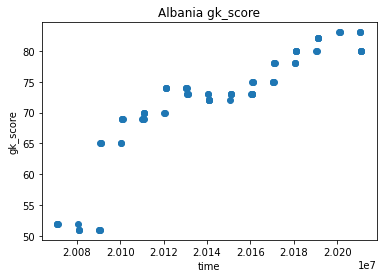

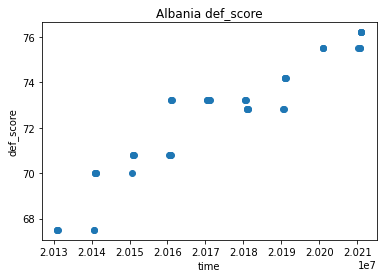

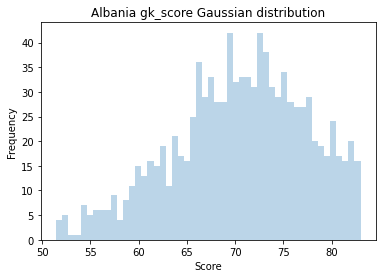

true mean =  71.85858585858585
standard deviation =  8.87171205393191
min =  51.0
max =  83.0


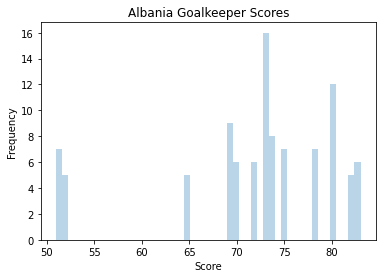

In [131]:
#show_model_data('Congo')
show_model_data('Albania')

# gaussian distribution for country, pos_score
def show_gaussian_pos_score(country, pos_score):
    data = fetch_country_pos_score(country, pos_score)
    params = get_gaussian_parameters(data)

    X = generate_truncated_gaussian(params)
    plt.hist(X.rvs(1000), bins= 50, alpha=0.3)
    plt.title("{} {} Gaussian distribution".format(country, pos_score))
    #plt.title("Albania Goalkeeper Score Gaussian Distribution")
    plt.xlabel("Score")
    plt.ylabel("Frequency")
    plt.show()

    print("true mean = ", params[0])
    print("standard deviation = ", params[1])
    print("min = ", params[2])
    print("max = ", params[3])

#show_gaussian_pos_score('Congo', 'gk_score')
show_gaussian_pos_score('Albania', 'gk_score')

#now creating a box plot for direct comparison with the distribution
data = fetch_country_pos_score('Albania', 'gk_score')
data_scores = np.split(data[0], 2, axis=1)
box_scores = []
for item in data_scores[1]:
    box_scores.append(item[0])
#print(box_scores)


plt.hist(box_scores, bins= 50, alpha=0.3)
plt.title("Albania Goalkeeper Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

#### Reconstruction

In [132]:
#fills in missing position scores for a single record
def fill_record_pos_scores(record):
    #countries in this record
    home = record['home_team']
    away = record['away_team']

    features = [
    'home_team_goalkeeper_score',
    'away_team_goalkeeper_score',
    'home_team_mean_defense_score',
    'away_team_mean_defense_score',
    'home_team_mean_offense_score',
    'away_team_mean_offense_score',
    'home_team_mean_midfield_score',
    'away_team_mean_midfield_score',
    ]

    #dictionary to check if a value corresponds to home or away team, and give the position
    check = {
    'home_team_goalkeeper_score':[1, 'gk_score'],
    'away_team_goalkeeper_score':[0, 'gk_score'],
    'home_team_mean_defense_score':[1, 'def_score'],
    'away_team_mean_defense_score':[0, 'def_score'],
    'home_team_mean_offense_score':[1, 'atk_score'],
    'away_team_mean_offense_score':[0, 'atk_score'],
    'home_team_mean_midfield_score':[1, 'mid_score'],
    'away_team_mean_midfield_score':[0, 'mid_score']
    }

    for feature in features:
        if record[feature] == 0:
            country = home
            if check[feature][0] == 0: 
                country = away
            position = check[feature][1]

            val = fetch_gaussian_pos_score(country, position)
            record[feature] = val
            #print(country, position, ":", val)

In [133]:
#fill all records
def fill_df_pos_scores(df):
    for index, record in df.iterrows():
        fill_record_pos_scores(record)

fill_df_pos_scores(g_df)

## Box Plot Visualisation

In [134]:
def gather_position_scores(df):
    #array of scores for each position:
    #goalkeeper, defense, attack, midfield

    pos_scores = [[], [], [], []]

    features = [
    'home_team_goalkeeper_score',
    'away_team_goalkeeper_score',
    'home_team_mean_defense_score',
    'away_team_mean_defense_score',
    'home_team_mean_offense_score',
    'away_team_mean_offense_score',
    'home_team_mean_midfield_score',
    'away_team_mean_midfield_score',
    ]

    #dictionary to check what index feature corresponds to in pos_scores array
    check = {
    'home_team_goalkeeper_score':0,
    'away_team_goalkeeper_score':0,
    'home_team_mean_defense_score':1,
    'away_team_mean_defense_score':1,
    'home_team_mean_offense_score':2,
    'away_team_mean_offense_score':2,
    'home_team_mean_midfield_score':3,
    'away_team_mean_midfield_score':3
    }

    for index, record in df.iterrows():
        for feature in features:
            if record[feature]:
                pos_scores[check[feature]].append(record[feature])

    return pos_scores

#print(gather_position_scores(g_df))

In [135]:
def draw_box_plot(data, title):
    plt.boxplot(data)
    plt.title(title)
    plt.show()

#draw_box_plot([1, 2, 2, 3, 4, 3, 5, 9, 1, 2, 2, 2, 2], "Example Plot")

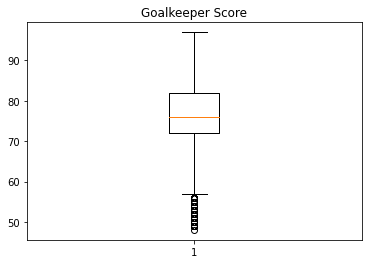

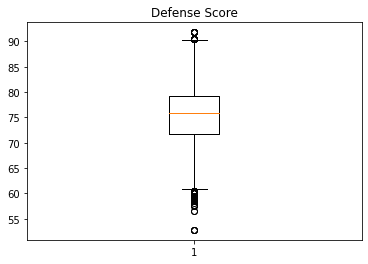

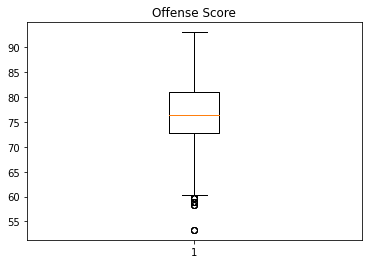

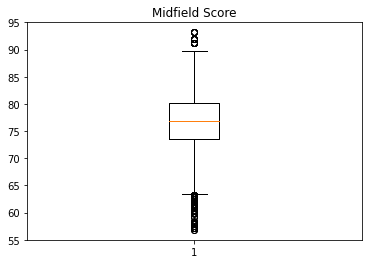

10555
10581
10949
10800


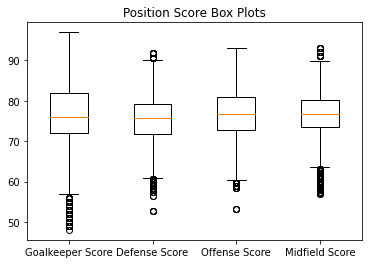

In [136]:
def draw_position_box_plots(df):
    position_scores = gather_position_scores(df)
    pos_names = [
    'gk_score',
    'def_score',
    'atk_score',
    'mid_score'
    ]

    pos_names = [
        'Goalkeeper Score',
        'Defense Score',
        'Offense Score',
        'Midfield Score'
    ]

    #drawing one by one
    for i in range(len(pos_names)):
        draw_box_plot(position_scores[i], pos_names[i])

    for i in position_scores:
        print(len(i))

    
    #drawing all in same graph
    plot_data = pd.DataFrame({
        'Goalkeeper Score' : position_scores[0][:10554],
        'Defense Score' : position_scores[1][:10554],
        'Offense Score' : position_scores[2][:10554],
        'Midfield Score' : position_scores[3][:10554]
    })

    my_dict = {
        'Goalkeeper Score' : position_scores[0][:10554],
        'Defense Score' : position_scores[1][:10554],
        'Offense Score' : position_scores[2][:10554],
        'Midfield Score' : position_scores[3][:10554]
    }
    fig, ax = plt.subplots()
    ax.boxplot(my_dict.values())
    ax.set_xticklabels(my_dict.keys())
    ax.set_title('Position Score Box Plots')

    #draw_box_plot(plot_data, 'Position Score Box Plots')

draw_position_box_plots(g_df)

## Feature Engineering

### Position Score Averages

In [137]:
def fill_score_average_record(record, df, index):
    #countries in this record

    home_score = [
    'home_team_goalkeeper_score', 
    'home_team_mean_defense_score', 
    'home_team_mean_offense_score',
    'home_team_mean_midfield_score',
    ]

    away_score = [
    'away_team_goalkeeper_score',
    'away_team_mean_defense_score',
    'away_team_mean_offense_score', 
    'away_team_mean_midfield_score',
    ]

    home_total = 0
    away_total = 0

    for feature in home_score:
        home_total += record[feature]
    for feature in away_score:
        away_total += record[feature]
    
    home_total /= len(home_score)
    away_total /= len(away_score)

    #print(home_total, away_total)

    df.at[index, 'home_team_total_average'] = home_total
    df.at[index, 'away_team_total_average'] = away_total

In [138]:
def create_score_averages(df):
    #first, create the new column for home advantage feature
    df['home_team_total_average'] = ''
    df['away_team_total_average'] = ''
    for index, record in df.iterrows():
        fill_score_average_record(record, df, index)

create_score_averages(df)

### Goal Difference

In [139]:
def fill_goal_difference_record(record, df, index):
    #countries in this record

    home_goals = record['home_team_score']
    away_goals = record['away_team_score']
    goal_diff = abs(home_goals - away_goals)

    #print(goal_diff)

    df.at[index, 'goal_difference'] = goal_diff

In [140]:
def create_goal_differences(df):
    #first, create the new column for home score difference feature
    df['goal_difference'] = ''
    for index, record in df.iterrows():
        fill_goal_difference_record(record, df, index)
    del df['home_team_score']
    del df['away_team_score']

create_goal_differences(df)

### Rank Difference

In [141]:
def fill_rank_difference_record(record, df, index):
    #countries in this record

    home_rank = record['home_team_fifa_rank']
    away_rank = record['away_team_fifa_rank']
    rank_diff = home_rank - away_rank

    #print(rank_diff)

    df.at[index, 'home_team_rank_difference'] = rank_diff

In [142]:
def create_rank_differences(df):
    #first, create the new column for home rank difference feature
    df['home_team_rank_difference'] = ''
    for index, record in df.iterrows():
        fill_rank_difference_record(record, df, index)

create_rank_differences(df)

## Export DataFrame to CSV

In [ ]:
def export_csv(df, name):
    filename = name + ".csv"
    df.to_csv(filename)

#export_csv(df, "feature_match_history")

## **4. Methodology Overview**

"Start by describing in broad terms your methodology. Include any background reading you may have done and a step by step description of how you have trained and evaluated your model. Describe any feature engineering that you have applied. If you had attempted different approaches prior to landing on your final methodology, then describe those approaches here."

*Code for the equivalent section in your report, together with in-line documentation of that code.*

In [ ]:
#Code blocks testing each method?
#More code blocks displaying results of experiments?

## **5. Model Training & Validation**

"This contains a breakdown of how your model was trained and evaluated."

*Code for the equivalent section in your report, together with in-line documentation of that code.*

In [ ]:
#Code for our chosen model
#More code for testing our model

## **6. Results**

"Here you show the results that you obtain using your model on the training data. If you have multiple variations or approaches, this is where you compare them."

*Code for the equivalent section in your report, together with in-line documentation of that code.*

In [ ]:
#Code for data visualisations of results

## **7. Final Predictions on Test Set**

"This is the section where you perform your final predictions on the test set using the model that you have trained in the previous section."

*Code for the equivalent section in your report, together with in-line documentation of that code.*

In [ ]:
#Code for performing the final prediction

## Credits

(Alphabetical ordering is my weakness...)

Minyong Cheong
<br>
Justin Koo
<br>
Adel Mouffok
<br>
James Parkington
<br>
Chris Sim
<br>
Angellika Vojevodina